In [1]:
import pandas as pd
import numpy as np

df_distancias = pd.read_csv('matriz_distancias1.csv', index_col = [0])

In [2]:
df_alcanzable = np.zeros((276, 276), dtype = int)

for i in df_distancias.index:
    for j in df_distancias.columns:
        j = int(j)
        if i<j:
            try:
                mins = float(df_distancias[str(i)][j].strip(')').split(',')[-1])

                if mins<30:
                    df_alcanzable[i][j] = 1
                    df_alcanzable[j][i] = 1
                else:
                    df_alcanzable[i][j] = 0
                    df_alcanzable[j][i] = 0
            except: pass

In [3]:
df_alcanzable = pd.DataFrame(df_alcanzable)
x = np.arange(1, 277)
df_alcanzable.index = x
df_alcanzable.columns = x

df_alcanzable.to_csv('df_alcanzable.csv')

Text(0.5, 1.0, 'Distribution on the number of reachable stations')

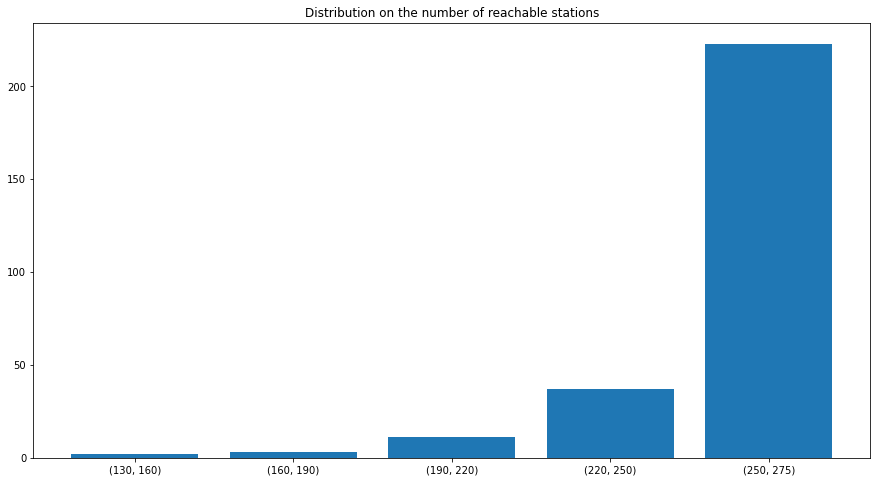

In [53]:
n_alcanzables = {}

for i in df_alcanzable.columns:
    n = sum(list(df_alcanzable[i]))
    n_alcanzables[int(i)] = n
    
import matplotlib.pyplot as plt

stations = np.arange(1, 277)
values = list(n_alcanzables.values())

aux = pd.DataFrame(list(zip(stations, values)), columns = ['stats', 'n'])

aux = aux.groupby(['n'], as_index = False)['stats'].count()

rangos = [(130, 160), (160, 190), (190, 220), (220, 250), (250, 275)]

lista_valores = []

for r in rangos:
    aa = 0
    n, m = r
    for i in aux.index:
        if aux['n'][i] > n and aux['n'][i] <= m:
            aa += aux['stats'][i]
            
    lista_valores.append(aa)
    
rangos = [str(r) for r in rangos]    
    
plt.figure(figsize=(15, 8))
plt.bar(rangos, lista_valores)
plt.title('Distribution on the number of reachable stations')

In [15]:
prob_bike_dict = {}

for i, n in n_alcanzables.items():
    prob_bike_dict[i] = 1/n

In [24]:
df_probs = np.zeros((276, 276), dtype = float)

for i in df_alcanzable.index:
    for j in df_alcanzable.columns:
        j = int(j)
        if i<j:
            try:
                a = df_alcanzable[i][j]
                if a == 1:
                    
                    df_probs[j-1][i-1] = prob_bike_dict[i]
                    df_probs[i-1][j-1] = prob_bike_dict[i]

                else: pass
                    
            except: pass
        
df_probs = pd.DataFrame(df_probs)

x = np.arange(1, 277)
df_probs.index = x
df_probs.columns = x

In [50]:
df_probs.to_csv('df_probabilities.csv')